## Analisi delle simulazioni

In [2]:
import numpy as np
from scipy.io import savemat
import matplotlib.pyplot as plt
from analisirisultati1d import *

-0.0066
Tempo totale: 1872
Dimensioni del reticolo: 2000
Densità totale particelle 5.0


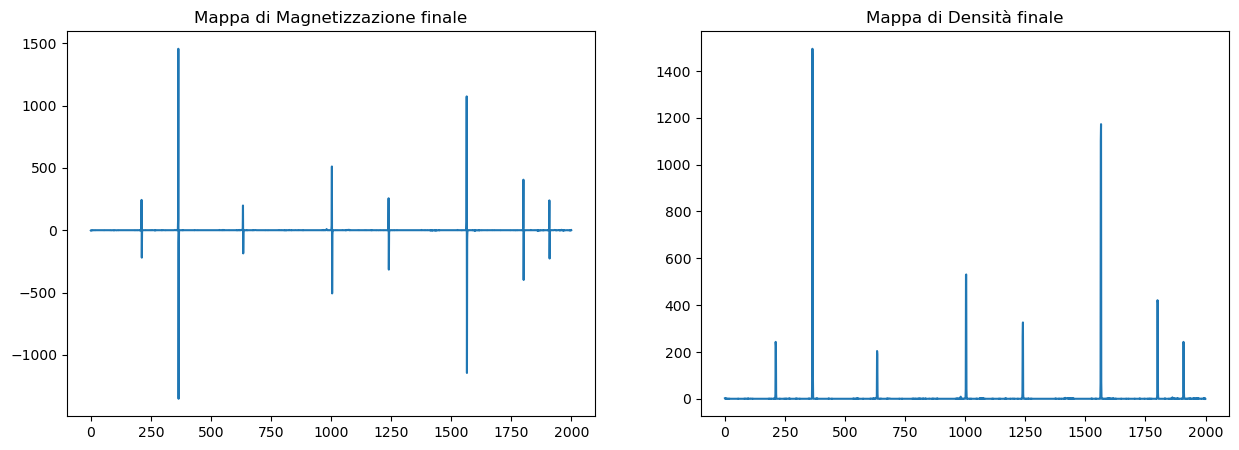

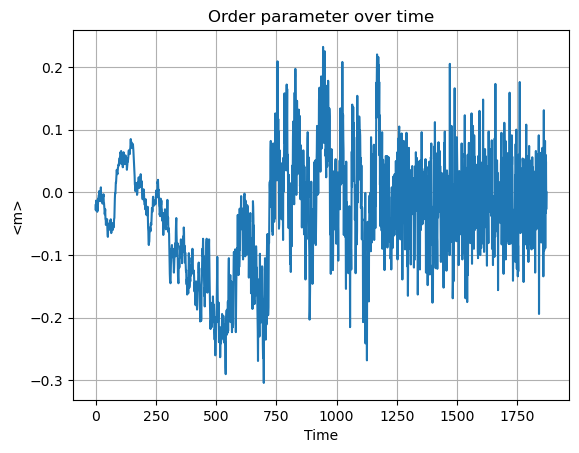

In [4]:
from scipy.io import loadmat # type: ignore

percorso = '/Users/annat/Dati/Tempo formazione aster 1D/1Dtime2T0.200L2000localframes_m.mat'
percorso2 ='/Users/annat/Dati/Tempo formazione aster 1D/1Dtime2T0.200L2000localframes_d.mat'
dati = loadmat(percorso)
dati2 = loadmat(percorso2)

carica = True

T = 0.2
D = 1
gamma = 0.02
metodo_calcolo = 1
frames = 10_000
t_tot = 15_000_000

magnet = dati['frames_m']
magnet = np.array(magnet, dtype=np.float64)

density = dati2['frames_d']
density = np.array(density, dtype=np.float64)

magnet_finale = magnet[-4, :]
magnet_finale =  np.squeeze(magnet_finale)

density_finale = density[-4, :]
density_finale =  np.squeeze(density_finale)

tempo = np.shape(magnet)[0]
L = np.shape(magnet)[1]
densità_particelle = np.sum(density_finale)/(L)
media_finale = np.mean(magnet_finale)/densità_particelle
print(media_finale)


print('Tempo totale:', tempo)
print('Dimensioni del reticolo:', L)
print('Densità totale particelle', densità_particelle)
plot_finali(magnet, density, tempo, L)


In [211]:
carica = False
if carica:
    # Percorso base con placeholder
    base_path =  '/Users/annat/Dati/Distruggi aster 1D/L1500/1Ddestroy{}T0.200L1500gamma0.1600frames_{}.mat'
    # Lista per salvare i risultati
    magnetizzazioni_finali = []

    # Loop sulle 20 simulazioni
    for i in range(1,21):
        # Crea i percorsi per magnetizzazione e densità

        path_m = base_path.format(i, 'm')
        path_d = base_path.format(i, 'd')

        # Carica i dati
        dati_m = loadmat(path_m)
        dati_d = loadmat(path_d)
        #print(i)

        magnet = np.array(dati_m['frames_m'], dtype=np.float64)
        density = np.array(dati_d['frames_d'], dtype=np.float64)

        # Estrai l'ultimo frame
        magnet_finale = np.squeeze(magnet[-1, :])
        density_finale = np.squeeze(density[-1, :])

        L = np.shape(magnet)[1]

        # Calcolo densità e media normalizzata
        densità_particelle = np.sum(density_finale) / L
        media_finale = np.abs(np.mean(magnet_finale) / densità_particelle)

        # Salva il risultato
        magnetizzazioni_finali.append(media_finale)

        # Converto in array per comodità
        #magnetizzazioni_finali = np.array(magnetizzazioni_finali)

        # Stampa dei risultati
        if i == 20:
            print(', '.join(f'{v:.4f}' for v in magnetizzazioni_finali))

Soglia magnetizzazione (solo t=0): 13.054273557551792
Soglia magnetizzazione (media prime 50): 19.14621272377901
Soglia densità (solo t=0): 16.76860229593982
Soglia densità (media prime 50): 14.931324181598344


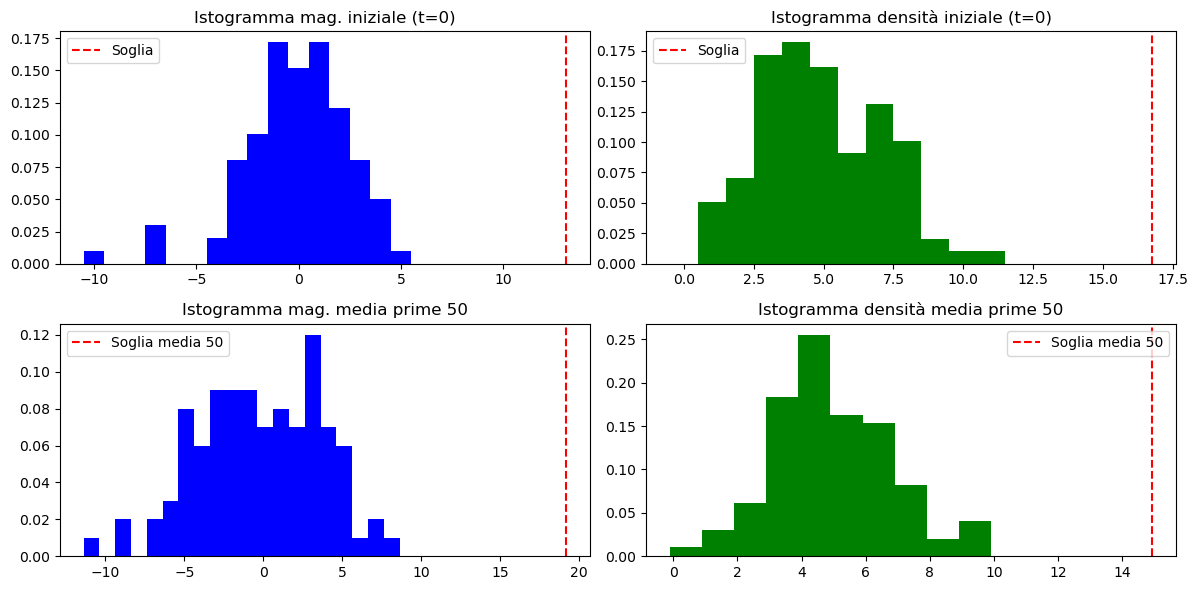

In [212]:
soglia = istogrammi_soglia(magnet, density, prime_immagini=50)

# Asters

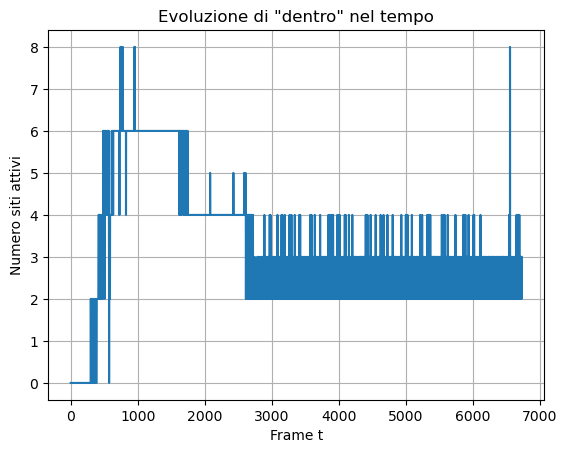

In [213]:
evoluzione_dentro(magnet, soglia, tempo)

In [214]:
asters = indici_aster(density_finale, soglia)

In [215]:
tempo = tempo_2aster_definitivo(magnet, soglia)
tempofisico = tempo_fisico(tempo-1,t_tot,frames, T, D)
print('Tempo per la scomparsa di un aster:', tempofisico)

Tempo per la scomparsa di un aster: 86801.05496072189


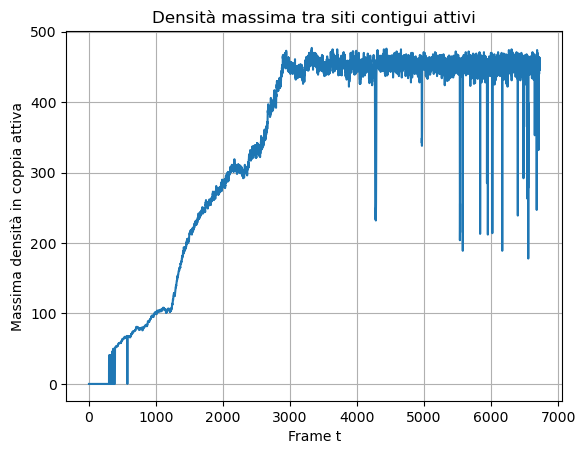

Densità massima raggiunta in un aster: 477.0


In [216]:
densità_finale = densita_massima(magnet, density, soglia)
print('Densità massima raggiunta in un aster:', np.max(densità_finale))